<a href="https://colab.research.google.com/github/Ri796/Handwritten-digit-recognition/blob/main/inference_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

In [ ]:

from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

Device: cuda


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
  def __init__(self):
    super().__init__()

    self.conv1=nn.Conv2d(1,32, kernel_size=3)
    self.conv2=nn.Conv2d(32,64, kernel_size=3)
    self.conv3=nn.Conv2d(64,128, kernel_size=3)
    self.pool=nn.MaxPool2d(kernel_size=2, stride=2)
    self.fc1=nn.Linear(128*1*1,128)
    self.fc2=nn.Linear(128,10)


  def forward(self,x):
    x=F.relu(self.conv1(x))
    x=self.pool(x)
    x=F.relu(self.conv2(x))
    x=self.pool(x)
    x=F.relu(self.conv3(x))
    x=self.pool(x)
    x = x.view(x.size(0), -1)
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    return x

model = CNN()

model.load_state_dict(torch.load("/content/drive/MyDrive/mnist_cnn_model.pth",
                                 map_location=torch.device("cpu")))
model.to(device)
model.eval()

CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=128, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [ ]:
transform = transforms.Compose([transforms.Grayscale(), transforms.Resize((28, 28)), transforms.ToTensor(),
                                transforms.Lambda(lambda x:1-x),
                                transforms.Normalize((0.1307,), (0.3081,))])


In [ ]:
img=Image.open("pic 6.jpeg")
img=transform(img)
img=img.unsqueeze(0).to(device)

In [ ]:
with torch.no_grad():
    output = model(img)
    _, predicted = torch.max(output.data, 1)
    print(predicted)

tensor([6], device='cuda:0')


In [ ]:
digit_mapping = {
    0: "zero",
    1: "one",
    2: "two",
    3: "three",
    4: "four",
    5: "five",
    6: "six",
    7: "seven",
    8: "eight",
    9: "nine"}

the number is : eight


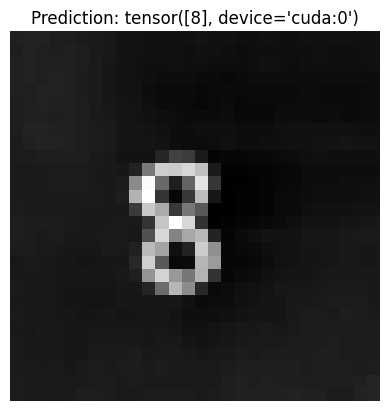

In [ ]:
plt.imshow(img.cpu().squeeze(), cmap="gray")
plt.title(f"Prediction: {predicted}")
print("the number is :" ,digit_mapping[predicted.item()])
plt.axis("off")
plt.show()


Images found:-  5 images: ['pic 3.jpeg', 'pic 7.jpeg', 'pic 6.jpeg', 'pic 5.jpeg', 'pic 8.jpeg']

pic 3.jpeg: Predicted = 3
the number is : three


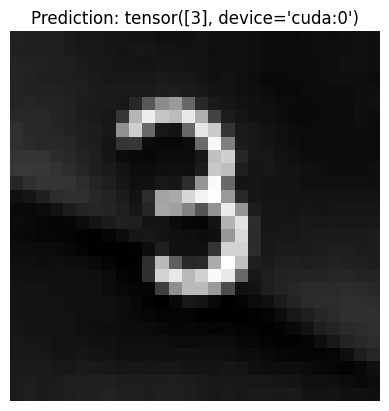

pic 7.jpeg: Predicted = 7
the number is : seven


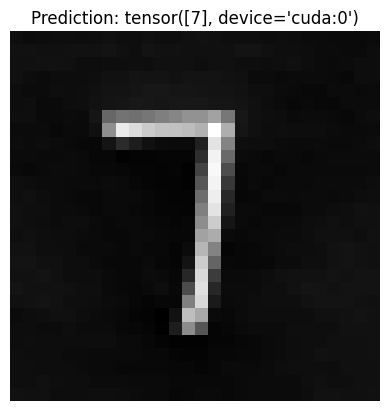

pic 6.jpeg: Predicted = 6
the number is : six


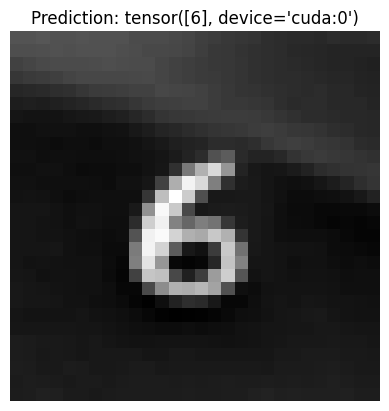

pic 5.jpeg: Predicted = 8
the number is : eight


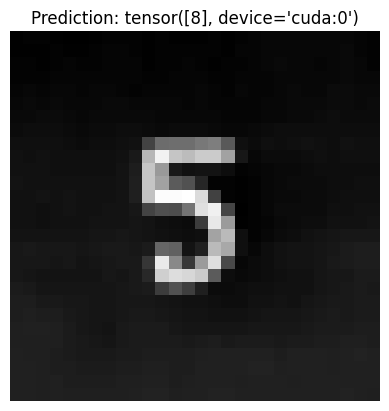

pic 8.jpeg: Predicted = 8
the number is : eight


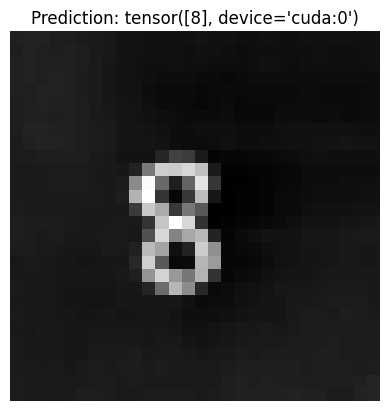


ALL RESULTS
pic 3.jpeg: 3
pic 7.jpeg: 7
pic 6.jpeg: 6
pic 5.jpeg: 8
pic 8.jpeg: 8


In [ ]:
import os
from PIL import Image

image_folder = "/content/drive/MyDrive/digits_input"
image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

if not image_files:
    print("No images found ")
else:
    print(f"Images found:-  {len(image_files)} images: {image_files}\n")

    results = []
    for filename in image_files:
        img_path = os.path.join(image_folder, filename)
        img = Image.open(img_path).convert('L')
        img = transform(img)
        img = img.unsqueeze(0).to(device)

        with torch.no_grad():
            output = model(img)
            _, predicted = torch.max(output, 1)
            predicted_digit = predicted.item()

        results.append((filename, predicted_digit))
        print(f"{filename}: Predicted = {predicted_digit}")




        plt.imshow(img.cpu().squeeze(), cmap="gray")
        plt.title(f"Prediction: {predicted}")
        print("the number is :" ,digit_mapping[predicted_digit])
        plt.axis("off")
        plt.show()




    print("\nALL RESULTS")
    for filename, digit in results:
        print(f"{filename}: {digit}")